In [22]:
##############################
# Solves -u'' + u = f        #
# With zero Neumann boundary #
##############################
import radiant as rad
import numpy as np
from IPython.display import HTML


# Problem Parameters
a = -1.
b = 1.


def u(x):
    return np.cos(x * 2 * np.pi / (b - a))


def f(x):
    return ((2 * np.pi / (b - a)) ** 2 + 1) * np.cos(x * 2 * np.pi / (b - a))

In [23]:
# Parameters
d = 1
k = 1
inner_levels = 5
outer_levels = 3
start_ncentres = 4
start_delta = 2.

# Computed parameters
phi = rad.Wendland(d, k)
centre_thinning = 2. ** np.arange(0, inner_levels)
delta_thinning = 2. ** np.arange(0, inner_levels)
centres = [np.arange(a, b + inc, inc) for inc in (b - a) / (centre_thinning * start_ncentres)]
delta = start_delta / delta_thinning

# Integration
integrator = rad.integrate.TrapezoidIntegrator(a, b, 5000)
error_integrator = rad.integrate.LeggaussIntegrator(a, b, 500)

# Solve for approximate solution
solver = rad.solve.MultilevelSolver(phi, centres, delta, rad.solve.HelmholtzBaseSolver, integrator, outer=outer_levels)
approx = solver.solve(f)
error = rad.error(u, approx, error_integrator)

print("L2 Relative Error:", error)
# print("Condition Numbers:", solver.cond())

L2 Relative Error: 0.0032877935823605485


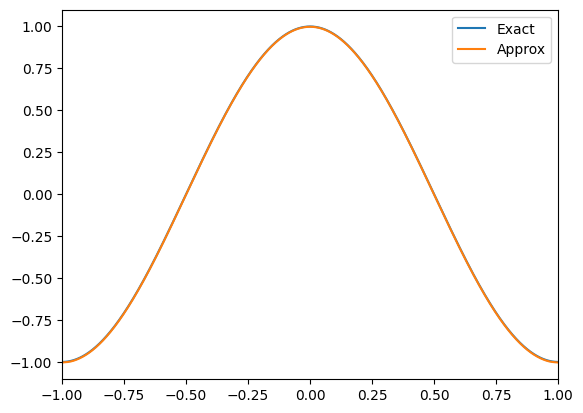

In [24]:
rad.plot.many(a, b, u, approx, labels=["Exact", "Approx"])

In [25]:
anim = rad.animate.ml_animate(a, b, u, approx)
HTML(anim.to_jshtml())

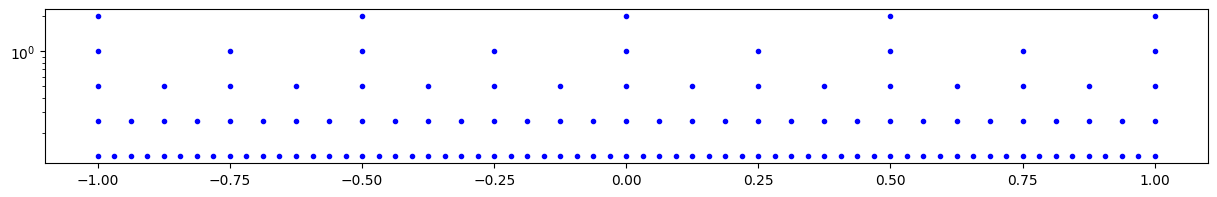

In [26]:
rad.plot.thinning(centres, delta, figsize=(15, 2))